In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
import os
import cv2

In [2]:

img_array = cv2.imread("C:/Users/raush/OneDrive/Desktop/Dataset/train/without_mask/1.jpg")

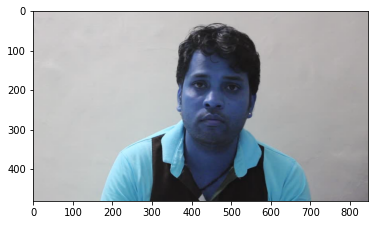

In [3]:
plt.imshow(img_array)

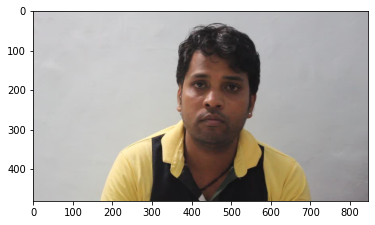

In [4]:
plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))

In [5]:
img_array.shape

(480, 846, 3)

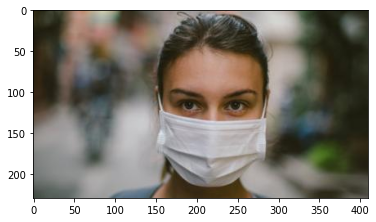

In [6]:
Datadiractory = "C:/Users/raush/OneDrive/Desktop/Dataset/train/"
Classes = ["with_mask","without_mask"]
for category in Classes:
    path = os.path.join(Datadiractory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

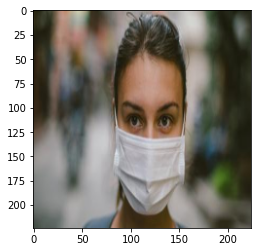

In [7]:
imgsize = 224
now_array = cv2.resize(img_array,(imgsize,imgsize))
plt.imshow(cv2.cvtColor(now_array,cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
training_data = []
def create_training_data():
    for category in Classes:
        path = os.path.join(Datadiractory,category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array,(imgsize,imgsize))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

                                   

In [9]:
create_training_data()

In [10]:
print(len(training_data))

1310


In [11]:
x = []
y = []
for feature,lable in training_data:
    x.append(feature)
    y.append(lable)

In [12]:
x = np.array(x).reshape(-1,imgsize,imgsize,3)

In [13]:
x.shape

(1310, 224, 224, 3)

In [14]:
x = x/255.0

In [15]:
y[20]

0

In [16]:
y = np.array(y)

In [18]:
from tensorflow import keras
from tensorflow.keras import layers


In [19]:
model = tf.keras.applications.mobilenet.MobileNet()

In [20]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [21]:
base_input = model.layers[0].input
base_output = model.layers[-4].output


In [22]:
flaten_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flaten_layer)
final_output  = layers.Activation('softmax')(final_output)



In [23]:
new_model  = keras.Model( inputs= base_input, outputs = final_output)

In [24]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [25]:
new_model.compile(loss= 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [26]:
new_model.fit(x,y,epochs = 4, validation_split = 0.1, batch_size = 50)

Epoch 1/4
24/24 [==============================] - 783s 31s/step - loss: 0.1109 - accuracy: 0.4436 - val_loss: 10.3728 - val_accuracy: 1.0000
Epoch 2/4
24/24 [==============================] - 524s 21s/step - loss: 0.0248 - accuracy: 0.4436 - val_loss: 31.7067 - val_accuracy: 1.0000
Epoch 3/4
24/24 [==============================] - 537s 22s/step - loss: 0.0051 - accuracy: 0.4436 - val_loss: 14.9328 - val_accuracy: 1.0000
Epoch 4/4
24/24 [==============================] - 544s 23s/step - loss: 3.6130e-04 - accuracy: 0.4436 - val_loss: 1.9673 - val_accuracy: 1.0000


In [27]:
new_model.save("face.h5")

In [28]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import cv2
from ke
facedetect = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
threshold=0.90
cap=cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)
font=cv2.FONT_HERSHEY_COMPLEX
model = load_model('face.h5')

def preprocessing(img):
    img=img.astype("uint8")
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img=cv2.equalizeHist(img)
    img = img/255
    return img


def get_className(classNo):
	if classNo==0:
		return "Mask"
	elif classNo==1:
		return "No Mask"


while True:
	sucess, imgOrignal=cap.read()
	faces = facedetect.detectMultiScale(imgOrignal,1.3,5)
	for x,y,w,h in faces:
		# cv2.rectangle(imgOrignal,(x,y),(x+w,y+h),(50,50,255),2)
		# cv2.rectangle(imgOrignal, (x,y-40),(x+w, y), (50,50,255),-2)
		crop_img=imgOrignal[y:y+h,x:x+h]
		img=cv2.resize(crop_img, (32,32))
		img=preprocessing(img)
		img=img.reshape(1, 32, 32, 1)
		# cv2.putText(imgOrignal, "Class" , (20,35), font, 0.75, (0,0,255),2, cv2.LINE_AA)
		# cv2.putText(imgOrignal, "Probability" , (20,75), font, 0.75, (255,0,255),2, cv2.LINE_AA)
		prediction=model.predict(img)
		classIndex=model.predict_classes(img)
		probabilityValue=np.amax(prediction)
		if probabilityValue>threshold:
			if classIndex==0:
				cv2.rectangle(imgOrignal,(x,y),(x+w,y+h),(0,255,0),2)
				cv2.rectangle(imgOrignal, (x,y-40),(x+w, y), (0,255,0),-2)
				cv2.putText(imgOrignal, str(get_className(classIndex)),(x,y-10), font, 0.75, (255,255,255),1, cv2.LINE_AA)
			elif classIndex==1:
				cv2.rectangle(imgOrignal,(x,y),(x+w,y+h),(50,50,255),2)
				cv2.rectangle(imgOrignal, (x,y-40),(x+w, y), (50,50,255),-2)
				cv2.putText(imgOrignal, str(get_className(classIndex)),(x,y-10), font, 0.75, (255,255,255),1, cv2.LINE_AA)

			# cv2.putText(imgOrignal,str(round(probabilityValue*100, 2))+"%" ,(180, 75), font, 0.75, (255,0,0),2, cv2.LINE_AA)
	cv2.imshow("Result",imgOrignal)
	k=cv2.waitKey(1)
	if k==ord('q'):
		break


cap.release()
cv2.destroyAllWindows()



AttributeError: module 'keras.utils.generic_utils' has no attribute 'populate_dict_with_module_objects'